In [2]:
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import io

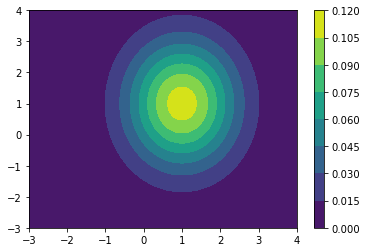

In [3]:
x = np.linspace(-3, 4, 800)
y = np.linspace(-3, 4, 800)
x_grid, y_grid = np.meshgrid(x, y)
coordinate = np.dstack((x_grid, y_grid))
normal = scipy.stats.multivariate_normal.pdf(coordinate, mean=[1, 1], cov = [[1, 0], [0, 2]])
plt.contourf(x_grid, y_grid, normal)
plt.colorbar()
plt.show()

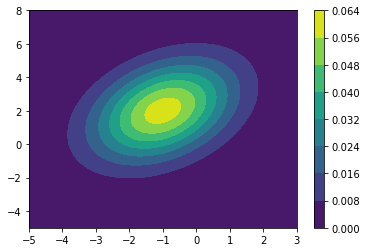

In [8]:
x = np.linspace(-5, 3, 800)
y = np.linspace(-5, 8, 1300)
x_grid, y_grid = np.meshgrid(x, y)
coordinate = np.dstack((x_grid, y_grid))
normal = scipy.stats.multivariate_normal.pdf(coordinate, mean=[-1, 2], cov = [[2, 1], [1, 4]])
plt.contourf(x_grid, y_grid, normal)
plt.colorbar()
plt.show()

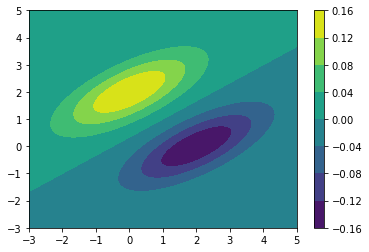

In [9]:
x = np.linspace(-3, 5, 800)
y = np.linspace(-3, 5, 800)
x_grid, y_grid = np.meshgrid(x, y)
coordinate = np.dstack((x_grid, y_grid))
normal_one = scipy.stats.multivariate_normal.pdf(coordinate, mean=[0, 2], cov = [[2, 1], [1, 1]])
normal_second = scipy.stats.multivariate_normal.pdf(coordinate, mean=[2, 0], cov = [[2, 1], [1, 1]])
plt.contourf(x_grid, y_grid, normal_one - normal_second)
plt.colorbar()
plt.show()

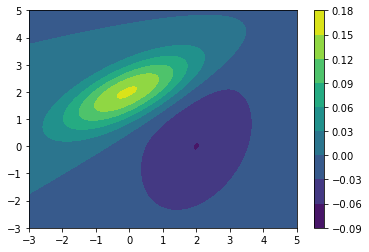

In [10]:
x = np.linspace(-3, 5, 800)
y = np.linspace(-3, 5, 800)
x_grid, y_grid = np.meshgrid(x, y)
coordinate = np.dstack((x_grid, y_grid))
normal_one = scipy.stats.multivariate_normal.pdf(coordinate, mean=[0, 2], cov = [[2, 1], [1, 1]])
normal_second = scipy.stats.multivariate_normal.pdf(coordinate, mean=[2, 0], cov = [[2, 1], [1, 4]])
plt.contourf(x_grid, y_grid, normal_one - normal_second)
plt.colorbar()
plt.show()

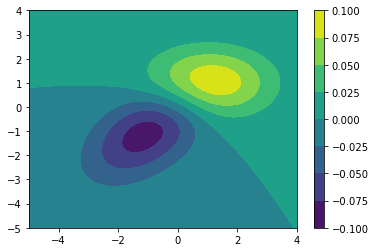

In [11]:
x = np.linspace(-5, 4, 900)
y = np.linspace(-5, 4, 900)
x_grid, y_grid = np.meshgrid(x, y)
coordinate = np.dstack((x_grid, y_grid))
normal_one = scipy.stats.multivariate_normal.pdf(coordinate, mean=[1, 1], cov = [[2, 0], [0, 1]])
normal_second = scipy.stats.multivariate_normal.pdf(coordinate, mean=[-1, -1], cov = [[2, 1], [1, 2]])
plt.contourf(x_grid, y_grid, normal_one - normal_second)
plt.colorbar()
plt.show()

In [3]:
np.random.seed(66)
x_one = np.random.normal(3, 3, 100)
x_two = 0.5 * x_one + np.random.normal(4, 2, 100)
points = []
for i in range(100):
    points.append([x_one[i], x_two[i]])
mean = np.mean(points, axis=0)
print(mean)

[3.37097779 5.95732222]


In [13]:
covariance_matrix = np.cov(points, rowvar = False)
print(covariance_matrix)

[[10.21800524  5.62895714]
 [ 5.62895714  6.4048105 ]]


In [14]:
eigenvalue, eigenvector = np.linalg.eig(covariance_matrix)
print(f"Eigenvalue: {eigenvalue}")
print(f"Eigenvector: {eigenvector}")

Eigenvalue: [14.25449393  2.3683218 ]
Eigenvector: [[ 0.81265285 -0.5827481 ]
 [ 0.5827481   0.81265285]]


Text(0.5, 1.0, 'Eigenvector from 100 data points')

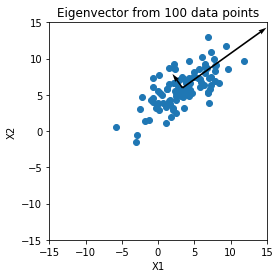

In [16]:
fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(x_one, x_two)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
ax.set_aspect('equal')
plt.quiver(mean[0], mean[1], eigenvector[0][0]*eigenvalue[0], eigenvector[1][0]*eigenvalue[0], angles='xy', scale_units='xy', scale =1)
plt.quiver(mean[0], mean[1], eigenvector[0][1]*eigenvalue[1], eigenvector[1][1]*eigenvalue[1], angles='xy', scale_units='xy', scale =1)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Eigenvector from 100 data points")

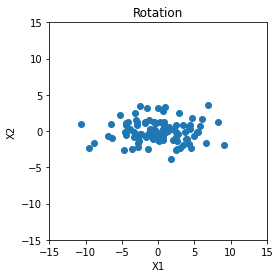

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal')
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Rotation")
rotated = []
for i in range(100):
    rotated.append([x_one[i]-mean[0], x_two[i]-mean[1]])
    rotation = np.dot(eigenvector.T, rotated[i])
    plt.scatter(rotation[0], rotation[1], color='tab:blue')

In [4]:
mnist = io.loadmat('data/mnist_data.mat')

for data_name in ["mnist"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
print("\nloaded %s data!" % data_name)
fields = "test_data", "training_data", "training_labels"
for field in fields:
    print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)


In [5]:
mnist_training_data = mnist['training_data']
mnist_training_labels = mnist['training_labels']
mnist_test = mnist['test_data']

normalize = np.linalg.norm(mnist_training_data, axis = 1)
normalized = np.expand_dims(normalize, axis=1)
mnist_training_data = mnist_training_data / normalized

mean_digit = []
covariance_digit = []

for i in range(10):
    digit = mnist_training_data[mnist_training_labels.reshape(-1) == i]
    temp_mean = np.mean(digit, axis=0)
    temp_covariance = np.cov(digit.T)
    mean_digit.append(temp_mean)
    covariance_digit.append(temp_covariance)

print(f"mean: {mean_digit}")
print(f"covariance: {covariance_digit}")

mean: [array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.94534087e-06,
       1.76810253e-05, 7.26808946e-06, 0.00000000e+00, 5.88133280e-06,
       1.60756430e-05, 7.64573265e-06, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,

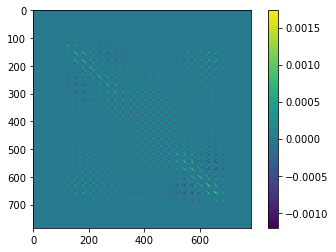

In [6]:
plt.imshow(covariance_digit[0])
plt.colorbar()

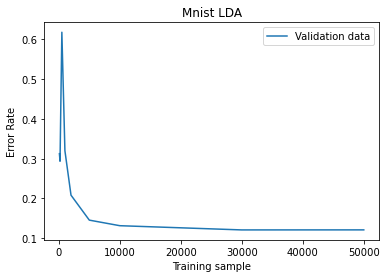

In [7]:
np.random.seed(66)
mnist_random = np.random.permutation(len(mnist_training_data))
mnist_training_data_shuffle = mnist_training_data[mnist_random]
mnist_training_labels_shuffle = mnist_training_labels[mnist_random]
mnist_valid_x = mnist_training_data_shuffle[:10000]
mnist_valid_y = mnist_training_labels_shuffle[:10000]
mnist_training_x = mnist_training_data_shuffle[10000:]
mnist_training_y = mnist_training_labels_shuffle[10000:]

training_examples = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]

def calculate(x, y, z):
    mean = []
    covariance = []
    prior = []
    length = []
    
    for j in range(10):
        digit = mnist_training_x_example[mnist_training_y_example.reshape(-1) == j]
        length.append(digit.shape[0])
        temp_mean = np.mean(digit, axis=0)
        temp_covariance = np.cov(digit.T)
        mean.append(temp_mean)
        covariance.append(temp_covariance)
        prior.append(np.log(digit.shape[0] / x.shape[0]))
    
    if (z == "lda"):
        cov_average = covariance[0]
        for k in range(1, 10):
            cov_average += covariance[k]
        
        cov_average = cov_average / 10
        return mean, cov_average, prior
    else:
        for k in range(10):
            covariance[k] /= length[k]
        return mean, covariance, prior


lda_error = []

for i in training_examples:
    pdf = []
    mnist_training_x_example = mnist_training_x[:i]
    mnist_training_y_example = mnist_training_y[:i]
    mean_i, covariance_i, prior_i = calculate(mnist_training_x_example, mnist_training_y_example, "lda")
    for j in range(10):
        pdf.append(scipy.stats.multivariate_normal.logpdf(mnist_valid_x, allow_singular=True, mean=mean_i[j], cov=covariance_i) + prior_i[j])
    index = np.argmax(pdf, axis = 0)
    reshape_index = index.reshape(-1,1)
    lda_error.append(1 - (np.sum(reshape_index == mnist_valid_y) / 10000))
    
plt.plot(training_examples, lda_error, label='Validation data')
plt.xlabel('Training sample')
plt.ylabel('Error Rate')
plt.title('Mnist LDA') 
plt.legend()
plt.show()

In [8]:
print(lda_error)

[0.3125, 0.29359999999999997, 0.6177, 0.31999999999999995, 0.20830000000000004, 0.14559999999999995, 0.13160000000000005, 0.121, 0.12109999999999999]


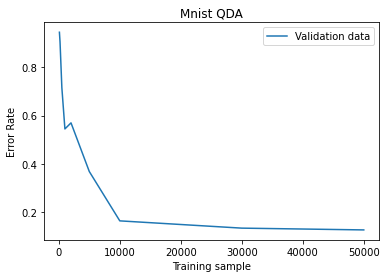

In [9]:
qda_error = []

for i in training_examples:
    pdf = []
    mnist_training_x_example = mnist_training_x[:i]
    mnist_training_y_example = mnist_training_y[:i]
    mean_i, covariance_i, prior_i = calculate(mnist_training_x_example, mnist_training_y_example, "qda")
    for j in range(10):
        pdf.append(scipy.stats.multivariate_normal.logpdf(mnist_valid_x, allow_singular=True, mean=mean_i[j], cov=covariance_i[j]) + prior_i[j])
    index = np.argmax(pdf, axis = 0)
    reshape_index = index.reshape(-1,1)
    qda_error.append(1 - (np.sum(reshape_index == mnist_valid_y) / 10000))
    
plt.plot(training_examples, qda_error, label='Validation data')
plt.xlabel('Training sample')
plt.ylabel('Error Rate')
plt.title('Mnist QDA') 
plt.legend()
plt.show()

In [10]:
print(qda_error)

[0.9464, 0.9064, 0.7161, 0.5447, 0.5699000000000001, 0.3677, 0.16279999999999994, 0.13260000000000005, 0.12519999999999998]


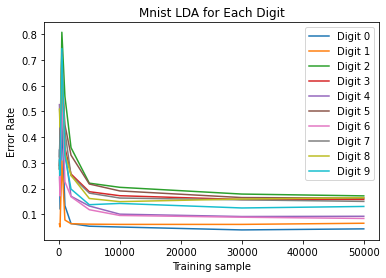

In [11]:
store = [[] for i in range(10)]
res = [[] for i in range(10)]
prediction = []

for i in training_examples:
    pdf = []
    mnist_training_x_example = mnist_training_x[:i]
    mnist_training_y_example = mnist_training_y[:i]
    mean_i, covariance_i, prior_i = calculate(mnist_training_x_example, mnist_training_y_example, "lda")
    for j in range(10):
        pdf.append(scipy.stats.multivariate_normal.logpdf(mnist_valid_x, allow_singular=True, mean=mean_i[j], cov=covariance_i) + prior_i[j])
    index = np.argmax(pdf, axis = 0)
    reshape_index = index.reshape(-1,1)
    prediction.append(reshape_index) 
    
def digit(prediction, label):
    lda_digit = []
    for j in range(10):
        correct = label[label == j]
        reshape_index = prediction[label == j]
        lda_digit.append(1 - np.sum(correct == reshape_index) / reshape_index.shape[0])
    return lda_digit
       
for i in range(9):
    store[i] = digit(prediction[i], mnist_valid_y)

for k in range(10):
    for i in range(9):
        res[k].append(store[i][k])

for i in range(10):
    plt.plot(training_examples, res[i], label= f"Digit {i}")
    
plt.xlabel('Training sample')
plt.ylabel('Error Rate')
plt.title('Mnist LDA for Each Digit') 
plt.legend()
plt.show()

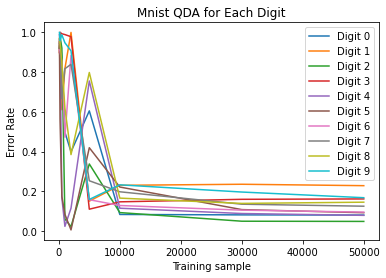

In [12]:
store_qda = [[] for i in range(10)]
res_qda = [[] for i in range(10)]
prediction_qda = []

for i in training_examples:
    pdf = []
    mnist_training_x_example = mnist_training_x[:i]
    mnist_training_y_example = mnist_training_y[:i]
    mean_i, covariance_i, prior_i = calculate(mnist_training_x_example, mnist_training_y_example, "qda")
    for j in range(10):
        pdf.append(scipy.stats.multivariate_normal.logpdf(mnist_valid_x, allow_singular=True, mean=mean_i[j], cov=covariance_i[j]) + prior_i[j])
    index = np.argmax(pdf, axis = 0)
    reshape_index = index.reshape(-1,1)
    prediction_qda.append(reshape_index) 
    
def digit(prediction, label):
    lda_digit = []
    for j in range(10):
        correct = label[label == j]
        reshape_index = prediction[label == j]
        lda_digit.append(1 - np.sum(correct == reshape_index) / reshape_index.shape[0])
    return lda_digit
       
for i in range(9):
    store_qda[i] = digit(prediction_qda[i], mnist_valid_y)

for k in range(10):
    for i in range(9):
        res_qda[k].append(store_qda[i][k])

for i in range(10):
    plt.plot(training_examples, res_qda[i], label= f"Digit {i}")
    
plt.xlabel('Training sample')
plt.ylabel('Error Rate')
plt.title('Mnist QDA for Each Digit') 
plt.legend()
plt.show()

In [13]:
normalize = np.linalg.norm(mnist_test, axis = 1)
normalized = np.expand_dims(normalize, axis=1)
mnist_test = mnist_test / normalized

pdf = []
mean_i, covariance_i, prior_i = calculate(mnist_training_x, mnist_training_y, "lda")
for j in range(10):
    pdf.append(scipy.stats.multivariate_normal.logpdf(mnist_test, allow_singular=True, mean=mean_i[j], cov=covariance_i) + prior_i[j])
index = np.argmax(pdf, axis = 0)
results_to_csv(index, "mnist")

def results_to_csv(y_test, name):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv(name + 'submission.csv', index_label='Id')

# predict = 1 - (np.sum(reshape_index == mnist_training_y) / i)
    
    
# plt.plot(training_examples, test, label='Training data')
# plt.xlabel('Training sample')
# plt.ylabel('Error Rate')
# plt.title('Mnist LDA') 
# plt.legend()
# plt.show()

NameError: name 'results_to_csv' is not defined

In [ ]:
spam = io.loadmat('data/spam_data.mat')
spam_training_data = spam['training_data']
spam_training_labels = spam['training_labels']
spam_test = spam['test_data']

In [ ]:
spam_random = np.random.permutation(len(spam_training_data))
spam_training_data_shuffle = spam_training_data[spam_random]
spam_training_labels_shuffle = spam_training_labels[spam_random]
spam_valid_x = spam_training_data_shuffle[:1000]
spam_valid_y = spam_training_labels_shuffle[:1000]
spam_training_x = spam_training_data_shuffle[1000:]
spam_training_y = spam_training_labels_shuffle[1000:]


def spam_calculate(x, y, z):
    mean = []
    covariance = []
    prior = []
    length = []
    
    for j in range(2):
        digit = spam_training_x[spam_training_y.reshape(-1) == j]
        length.append(digit.shape[0])
        temp_mean = np.mean(digit, axis=0)
        temp_covariance = np.cov(digit.T)
        mean.append(temp_mean)
        covariance.append(temp_covariance)
        prior.append(np.log(digit.shape[0] / x.shape[0]))
    
    if (z == "lda"):
        cov_average = covariance[0]
        for k in range(2):
            cov_average += covariance[k]
        cov_average = cov_average / 10
        return mean, cov_average, prior
    else:
        for k in range(2):
            covariance[k] /= length[k]
        return mean, covariance, prior    
    
spam_pdf = []
mean_i, covariance_i, prior_i = spam_calculate(spam_training_x, spam_training_y, "lda")
for j in range(2):
    spam_pdf.append(scipy.stats.multivariate_normal.logpdf(spam_test, allow_singular=True, mean=mean_i[j], cov=covariance_i) + prior_i[j])
# mean_i, covariance_i, prior_i = spam_calculate(spam_training_x, spam_training_y, "qda")
# for j in range(2):
#     spam_pdf.append(scipy.stats.multivariate_normal.logpdf(spam_valid_x, allow_singular=True, mean=mean_i[j], cov=covariance_i[j]) + prior_i[j])

index = np.argmax(spam_pdf, axis = 0)
print(index)
# reshape_index = index.reshape(-1,1)
# spam_error = (1 - (np.sum(reshape_index == spam_valid_y) / 1000))
# print(spam_error)
# results_to_csv(index, "spam")